# GREDIENT DESCENT MODEL:

In [ ]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [3]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [28]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
        dj_dw = dj_dw / m 
        dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [29]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw             
         # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [32]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings

iterations = 10000
tmp_alpha = 1.0e-2

# run gradient descent

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient_descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.00e+04  dj_dw: -5.750e+02, dj_db: -3.250e+02   w:  5.750e+00, b: 3.25000e+00
Iteration 1000: Cost 2.22e+00  dj_dw: -1.572e-01, dj_db:  2.776e-01   w:  1.963e+02, b: 1.06566e+02
Iteration 2000: Cost 9.52e-01  dj_dw: -1.030e-01, dj_db:  1.819e-01   w:  1.976e+02, b: 1.04302e+02
Iteration 3000: Cost 4.09e-01  dj_dw: -6.749e-02, dj_db:  1.192e-01   w:  1.984e+02, b: 1.02819e+02
Iteration 4000: Cost 1.76e-01  dj_dw: -4.422e-02, dj_db:  7.811e-02   w:  1.990e+02, b: 1.01847e+02
Iteration 5000: Cost 7.54e-02  dj_dw: -2.898e-02, dj_db:  5.118e-02   w:  1.993e+02, b: 1.01211e+02
Iteration 6000: Cost 3.24e-02  dj_dw: -1.899e-02, dj_db:  3.354e-02   w:  1.996e+02, b: 1.00793e+02
Iteration 7000: Cost 1.39e-02  dj_dw: -1.244e-02, dj_db:  2.198e-02   w:  1.997e+02, b: 1.00520e+02
Iteration 8000: Cost 5.97e-03  dj_dw: -8.153e-03, dj_db:  1.440e-02   w:  1.998e+02, b: 1.00341e+02
Iteration 9000: Cost 2.56e-03  dj_dw: -5.343e-03, dj_db:  9.436e-03   w:  1.999e+02, b: 1.00223e+02


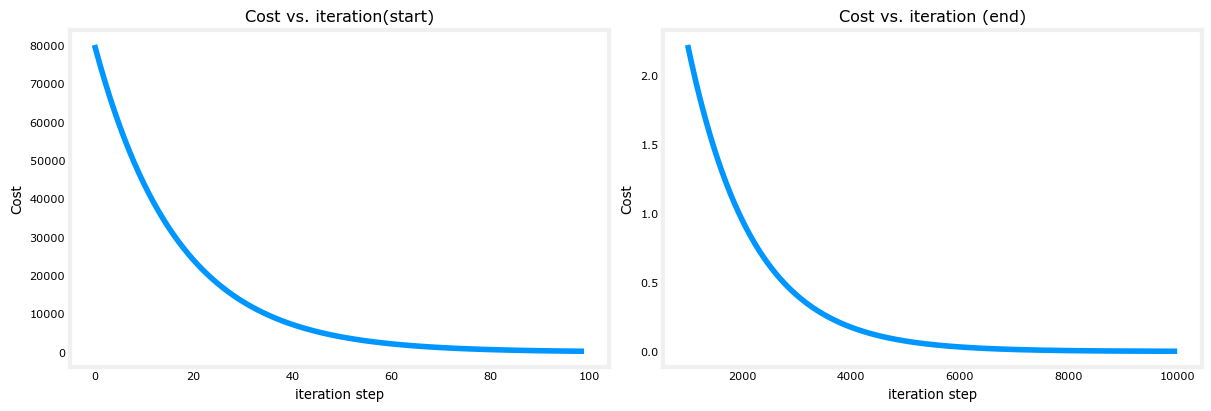

In [34]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [35]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.1 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


In [66]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
 plt_contour_wgrad(x_train, y_train, p_hist, ax)

IndentationError: unexpected indent (3663474154.py, line 2)

NameError: name 'plt_contour_wgrad' is not defined

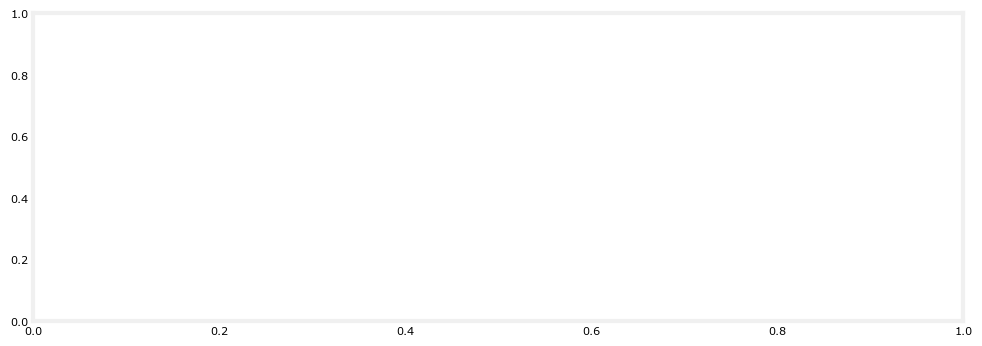

In [67]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
contours=[1,5,10,20],resolution=0.5)

In [55]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 1.60e+05  dj_dw: -5.750e+02, dj_db: -3.250e+02   w:  4.600e+02, b: 2.60000e+02
Iteration    1: Cost 2.97e+05  dj_dw:  7.850e+02, dj_db:  4.450e+02   w: -1.680e+02, b:-9.60000e+01
Iteration    2: Cost 5.56e+05  dj_dw: -1.073e+03, dj_db: -6.070e+02   w:  6.904e+02, b: 3.89600e+02
Iteration    3: Cost 1.03e+06  dj_dw:  1.465e+03, dj_db:  8.302e+02   w: -4.819e+02, b:-2.74560e+02
Iteration    4: Cost 1.93e+06  dj_dw: -2.003e+03, dj_db: -1.133e+03   w:  1.120e+03, b: 6.32096e+02
Iteration    5: Cost 3.61e+06  dj_dw:  2.735e+03, dj_db:  1.549e+03   w: -1.068e+03, b:-6.07258e+02
Iteration    6: Cost 6.74e+06  dj_dw: -3.737e+03, dj_db: -2.116e+03   w:  1.922e+03, b: 1.08527e+03
Iteration    7: Cost 1.26e+07  dj_dw:  5.106e+03, dj_db:  2.891e+03   w: -2.163e+03, b:-1.22769e+03
Iteration    8: Cost 2.35e+07  dj_dw: -6.976e+03, dj_db: -3.949e+03   w:  3.418e+03, b: 1.93163e+03
Iteration    9: Cost 4.38e+07  dj_dw:  9.530e+03, dj_db:  5.396e+03   w: -4.206e+03, b:-2.38520e+03


In [57]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

NameError: name 'plt_divergence' is not defined